In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.linear_model import  LinearRegression
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model   import LogisticRegression

In [2]:
df = pd.read_csv('seattle-weather.csv')
df.head(20)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [3]:
df.head(20).dropna()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [4]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [5]:
df.head(20).drop_duplicates()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


Root Mean Squared Error: 1.3489400685573751
R^2 Score: 0.04593324827400458


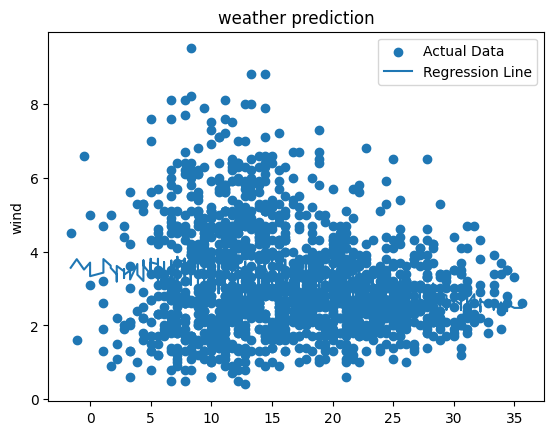

Predicted wind speed for temp_max=7.6, temp_min=5.0: 3.730331430601801


In [15]:
x = df[['temp_max', 'temp_min']]
y = df['wind']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

model = LinearRegression()
model.fit(x_train, y_train)

prediction = model.predict(x_test)
print("Root Mean Squared Error:", root_mean_squared_error(y_test, prediction))
print("R^2 Score:", r2_score(y_test, prediction))

# Plotting
df_sorted = df.sort_values('temp_max')
plt.scatter(df['temp_max'], df['wind'], label='Actual Data')

# Correct regression line
plt.plot(df_sorted['temp_max'], model.predict(df_sorted[['temp_max','temp_min']]),
         label='Regression Line')

plt.ylabel('wind')
plt.title('weather prediction')
plt.legend()
plt.show()

# Prediction for new values
temp_max = 7.6
temp_min = 5.0

new_data = pd.DataFrame({
    'temp_max': [temp_max],
    'temp_min': [temp_min]
})

predicted_value = model.predict(new_data)
print(f"Predicted wind speed for temp_max={temp_max}, temp_min={temp_min}: {predicted_value[0]}")

